# **Module 10 - Opta Feeds**
## **Definition**
For this Task I am going to calculate the metric **High Pressure Conversion Rate (HPCR)**, which calculates the percentage of defensive actions (tackles, interceptions, ball recoveries), made in the final third (Zone 3), that lead to a goal within the following 2 minutes. This metric is calculated for each team over a season and is designed to measure the effectiveness of pressing strategies.

*HPCR = (Goals scored within 2 minutes of a high-pressure action in the final third / Total high-pressure actions in final third) × 100*

High pressing is a key tactical approach in modern football, and this metric quantifies its immediate impact on goal scoring.

## **Zone 3 Explanation**
High pressing typically occurs in advanced zones of the pitch. Zone 3 (defined as x > 66.6) represents the attacking third, where pressing can most immediately lead to goal-scoring chances due to the proximity to the opponent's goal. High-pressure events in this zone (tackles, interceptions, and recoveries) often disrupt the opponent in vulnerable positions.

## **2 Minutes Timeframe Explanation**

A 2-minute window post-defensive action in the final third was chosen to capture the realistic impact timeframe within which a forced turnover is likely to translate into a goal. Two minutes is a reasonable threshold to establish a causal link between a high-pressure action and the resulting goal. It captures immediate sequences (transitions and counters) without being too broad to dilute causality.

## FUNCTIONS


In [68]:
import xml.etree.ElementTree as et
import pandas as pd
from IPython.core import display as ICD
from pandas import json_normalize
import pandas as pd
import tqdm as tqdm
import os
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from datetime import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt

#@title
types_dict={1:"Pass",2:"Offside Pass",3:"Take On",4:"Foul",5:"Out",6:"Corner Awarded",7:"Tackle",8:"Interception",9:"Turnover",10:"Save",11:"Claim",12:"Clearance",13:"Miss",14:"Post",15:"Attempt Saved",16:"Goal",17:"Card",18:"Player off",19:"Player on",20:"Player retired",21:"Player returns",22:"Player becomes goalkeeper",23:"Goalkeeper becomes player",24:"Condition change",25:"Official change",27:"Start delay",28:"End delay",30:"End",31:"Picked an orange",32:"Start",34:"Team set up",35:"Player changed position",36:"Player changed Jersey number",37:"Collection End",38:"Temp_Goal",39:"Temp_Attempt",40:"Formation change",41:"Punch",42:"Good Skill",43:"Deleted event",44:"Aerial",45:"Challenge",47:"Rescinded card",49:"Ball recovery",50:"Dispossessed",51:"Error",52:"Keeper pick-up",53:"Cross not claimed",54:"Smother",55:"Offside provoked",56:"Shield ball opp",57:"Foul throw-in",58:"Penalty faced",59:"Keeper Sweeper",60:"Chance missed",61:"Ball touch",63:"Temp_Save",64:"Resume",65:"Contentious referee decision",67:"50/50",68:"Referee drop ball",69:"Failed To Block",72:"Caught offside",73:"Other Ball Contact",74:"Blocked pass"};
types = pd.DataFrame.from_dict(types_dict,orient='index').reset_index()
types.columns=["type_id","event_name"]

qualifiers_dict={1:"Long ball",2:"Cross",3:"Head pass",4:"Through ball",5:"Free kick taken",6:"Corner taken",7:"Players caught offside",8:"Goal disallowed",9:"Penalty",10:"Hand",11:"6-seconds violation",12:"Dangerous play",13:"Foul",14:"Last line",15:"Head",16:"Small box-centre",17:"Box-centre",18:"Out of box-centre",19:"35+ centre",20:"Right footed",21:"Other body part",22:"Regular play",23:"Fast break",24:"Set piece",25:"From corner",26:"Free kick",28:"Own goal",29:"Assisted",30:"Involved",31:"Yellow Card",32:"Second yellow",33:"Red card",34:"Referee abuse",35:"Argument",36:"Fight",37:"Time wasting",38:"Excessive celebration",39:"Crowd interaction",40:"Other reason",41:"Injury",42:"Tactical",44:"Player position",49:"Attendance figure",50:"Official position",51:"Official ID",53:"Injured player id",54:"End cause",55:"Related event ID",56:"Zone",57:"End type",59:"Jersey number",60:"Small box-right",61:"Small box-left",62:"Box-deep right",63:"Box-right",64:"Box-left",65:"Box-deep left",66:"Out of box-deep right",67:"Out of box-right",68:"Out of box-left",69:"Out of box-deep left",70:"35+ right",71:"35+ left",72:"Left footed",73:"Left",74:"High",75:"Right",76:"Low left",77:"High left",78:"Low centre",79:"High centre",80:"Low right",81:"High right",82:"Blocked",83:"Close left",84:"Close right",85:"Close high",86:"Close left and high",87:"Close right and high",88:"High claim",89:"1 on 1",90:"Deflected save",91:"Dive and deflect",92:"Catch",93:"Dive and catch",94:"Def block",95:"Back pass",96:"Corner situation",97:"Direct free",100:"Six yard blocked",101:"Saved off line",102:"Goal mouth y co-ordinate",103:"Goal mouth z co-ordinate",106:"Attacking Pass",107:"Throw-in",108:"Volley",109:"Overhead",110:"Half Volley",111:"Diving Header",112:"Scramble",113:"Strong",114:"Weak",115:"Rising",116:"Dipping",117:"Lob",118:"One Bounce",119:"Few Bounces",120:"Swerve Left",121:"Swerve Right",122:"Swerve Moving",123:"Keeper Throw",124:"Goal Kick",127:"Direction of play",128:"Punch",130:"Team formation",131:"Team player formation",132:"Dive",133:"Deflection",134:"Far Wide Left",135:"Far Wide Right",136:"Keeper Touched",137:"Keeper Saved",138:"Hit Woodwork",139:"Own Player",140:"Pass End X",141:"Pass End Y",144:"Deleted event type",145:"Formation slot",146:"Blocked x co-ordinate",147:"Blocked y co-ordinate",153:"Not past goal line",154:"Intentional assist",155:"Chipped",156:"Lay-off",157:"Launch",158:"Persistent infringement",159:"Foul and abusive language",160:"Throw-in set piece",161:"Encroachment",162:"Leaving field",163:"Entering field",164:"Spitting",165:"Professional foul",166:"Handling on the line",167:"Out of play",168:"Flick-on",169:"Leading to attempt",170:"Leading to goal",171:"Rescinded card",172:"No impact on timing",173:"Parried safe",174:"Parried danger",175:"Fingertip",176:"Caught",177:"Collected",178:"Standing",179:"Diving",180:"Stooping",181:"Reaching",182:"Hands",183:"Feet",184:"Dissent",185:"Blocked cross",186:"Scored",187:"Saved",188:"Missed",189:"Player not visible",190:"From shot off target",191:"Off the ball foul",192:"Block by hand",194:"Captain",195:"Pull Back",196:"Switch of play",197:"Team kit",198:"GK hoof",199:"Gk kick from hands",200:"Referee stop",201:"Referee delay",202:"Weather problem",203:"Crowd trouble",204:"Fire",205:"Object thrown on pitch",206:"Spectator on pitch",207:"Awaiting officials decision",208:"Referee Injury",209:"Game end",210:"Assist",211:"Overrun",212:"Length",213:"Angle",214:"Big Chance",215:"Individual Play",216:"2nd related event ID",217:"2nd assisted",218:"2nd assist",219:"Players on both posts",220:"Player on near post",221:"Player on far post",222:"No players on posts",223:"In-swinger",224:"Out-swinger",225:"Straight",226:"Suspended",227:"Resume",228:"Own shot blocked",229:"Post-match complete",230:"GK X Coordinate",231:"GK Y Coordinate",232:"Unchallenged"};
qualifiers = pd.DataFrame.from_dict(qualifiers_dict,orient='index').reset_index()
qualifiers.columns = ["qualifier_id","description"]

qualifiers_dict2 = {str(key): str(value) for key, value in qualifiers_dict.items()}


def parsef24(F24file):
  tree = et.ElementTree(file = F24file)
  games = tree.getroot()
  gameinfo = games.findall('Game')
  gameinfo = gameinfo[0]
  game_id = gameinfo.get('id')
  home_team_id = gameinfo.get('home_team_id')
  home_team_name = gameinfo.get('home_team_name')
  away_team_id = gameinfo.get('away_team_id')
  away_team_name = gameinfo.get('away_team_name')
  competition_id = gameinfo.get('competition_id')
  competition_name = gameinfo.get('competition_name')
  season_id = gameinfo.get('season_id')

  global match_events
  match_events = pd.DataFrame()
  for game in games:
      for event in game:
          evento = json_normalize(event.attrib)
          mylist = []
          for q in event:
            mylist.append(q.attrib)
          evento["qualifiers"] = ["a"]
          evento.at[0,"qualifiers"] = mylist
          match_events = pd.concat([match_events,evento])
  match_events[["id","event_id","type_id","period_id","min","sec"]] = match_events[["id","event_id","type_id","period_id","min","sec"]].astype(int)
  match_events[["y","x"]] = match_events[["y","x"]].astype(float)
  match_events = pd.merge(match_events,types, on="type_id", how = "left")
  match_events = match_events[ ['id',"event_id","type_id", "event_name" ]+ [ col for col in match_events.columns if col not in ['id',"event_id","type_id", "event_name" ] ] ]
  match_events['competition_id'] = competition_id
  match_events['game_id'] = game_id
  match_events['home_team_id'] = home_team_id
  match_events['home_team_name'] = home_team_name
  match_events['away_team_id'] = away_team_id
  match_events['away_team_name'] = away_team_name
  match_events['competition_id'] = competition_id
  match_events['competition_name'] = competition_name
  match_events['season_id'] = season_id
  match_events['competition_id'] = competition_id

def explode_event(nome_df,id_evento,mytresh):
  global exploded_df
  exploded_df = pd.DataFrame()
  nome_df=nome_df[nome_df["type_id"]==id_evento]
  allqualifiers = pd.DataFrame()
  for i in range(len(nome_df)):
    qualifiers_detailed = json_normalize(nome_df.qualifiers.iloc[i]).T.reset_index().drop("index",axis=1).fillna("yes")
    qualifiers_detailed.columns = list(qualifiers_detailed.iloc[1])
    qualifiers_detailed = qualifiers_detailed.drop(labels=[0,1], axis=0)
    qualifiers_detailed.rename(columns=qualifiers_dict2,inplace=True)
    qualifiers_detailed["id"] = nome_df.id.iloc[i]
    allqualifiers = pd.concat([allqualifiers,qualifiers_detailed])
  exploded_df = pd.concat([exploded_df,pd.merge(nome_df.drop("qualifiers", axis=1), allqualifiers.reindex(sorted(allqualifiers.columns), axis=1).reset_index()\
                                            .drop("index", axis=1).dropna(thresh=len(allqualifiers)*mytresh, axis=1), on="id", how="outer")]).fillna("-")

## MAIN SCRIPT

In [69]:
# Path to the folder containing F24 XML match data files
basepath = "/content/drive/MyDrive/F24_La_Liga_2023/F24_La_Liga_2023/"

# Create empty DataFrames to collect all events and all goal events across all matches
all_events = pd.DataFrame()
all_goals = pd.DataFrame()

# Loop through all F24 XML files
for file in tqdm.tqdm(os.listdir(basepath)):
  if file.endswith(".xml"):
    parsef24(os.path.join(basepath, file)) # Parse the F24 XML to get match_events

    # --- High-Pressure Event Extraction ---

    # Get tackles in final third (Zone 3: x > 66.6)
    explode_event(match_events, 7, 0)
    tackles_z3 = exploded_df[exploded_df["x"] > 66.6]

    # Get interceptions in final third
    explode_event(match_events, 8, 0)
    interceptions_z3 = exploded_df[exploded_df["x"] > 66.6]

    # Get ball recoveries in final third
    ball_recovery_z3 = match_events[
        (match_events["event_name"]=="Ball recovery") & (match_events["x"] > 66.6)
    ]

    # Combine all high-pressure recovery events
    pressure_events  = pd.concat([tackles_z3, interceptions_z3, ball_recovery_z3])

    # Add total time in seconds for each pressure event
    pressure_events['total_time_seconds'] = pressure_events['min'] * 60 + pressure_events['sec']

    # Add default values for whether the pressure event led to a goal and at what minute
    pressure_events["Lead to Goal"] = 0
    pressure_events["Goal_minute"] = 0

    # --- Goal Linkage Logic ---

    # If there are any goals in the match
    if len(match_events[match_events["event_name"]=="Goal"]) > 0:
      explode_event(match_events, 16, 0)
      goals = exploded_df
      goals['total_time_seconds'] = goals['min'] * 60 + goals['sec']
      goal_info = goals[["team_id", "total_time_seconds"]]

       # Flag pressure events that lead to a goal within 2 minutes by same team
      pressure_events["Lead to Goal"] = pressure_events.apply(
          lambda row: any(
              0 < goal_row["total_time_seconds"] - row["total_time_seconds"] < 120
              and goal_row["team_id"] == row["team_id"]
              for _, goal_row in goal_info.iterrows()
          ), axis=1
      ).astype(int)

      # Record the actual minute of the goal (if applicable)
      pressure_events["Goal_minute"] = pressure_events.apply(
          lambda row: round(min(
              [goal_row["total_time_seconds"] for _, goal_row in goal_info.iterrows()
              if 0 < goal_row["total_time_seconds"] - row["total_time_seconds"] < 120
              and goal_row["team_id"] == row["team_id"]],
              default=0) / 60, 2), axis=1
      )

      # Store all goal events for future analysis
      all_goals = pd.concat([all_goals, goals])

    # Collect all pressure events for this match
    all_events = pd.concat([all_events, pressure_events])

  3%|▎         | 5/151 [00:32<15:31,  6.38s/it]<ipython-input-68-5c38ad11d98c>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_events['competition_id'] = competition_id
<ipython-input-68-5c38ad11d98c>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_events['game_id'] = game_id
<ipython-input-68-5c38ad11d98c>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [70]:
# --- Metric Calculation: High Pressure Conversion Rate (HPCR) ---

# Count all high pressure events per team
events_per_team = all_events.groupby("team_id")["Lead to Goal"].count().reset_index().rename(
    columns={"Lead to Goal": "High Pressure Events"}
)

# Count how many of those events led to goals per team
goals_per_team = all_events[all_events["Lead to Goal"] == 1].groupby("team_id")["Lead to Goal"].sum().reset_index().rename(
    columns={"Lead to Goal": "High Pressure Goals"}
)

# Merge event counts and goal counts to compute conversion rate
results = pd.merge(events_per_team, goals_per_team, on="team_id", how='left').fillna(0)
results["High Pressure Goals"] = results["High Pressure Goals"].astype(int)

# Compute the conversion rate (HPCR) = Goals / Events * 100
results["High Pressure Conversion Rate"] = results.apply(
    lambda row: round((row["High Pressure Goals"] / row["High Pressure Events"] * 100), 1)
    if row["High Pressure Events"] > 0 else 0,
    axis=1
)

# --- Attach Readable Team Names ---

# fetch correct team name for team_id (from either home or away side)
def get_team_name(row):
    if row['team_id'] in all_events['home_team_id'].values:
        return all_events.loc[all_events['home_team_id'] == row['team_id'], 'home_team_name'].values[0]
    elif row['team_id'] in all_events['away_team_id'].values:
        return all_events.loc[all_events['away_team_id'] == row['team_id'], 'away_team_name'].values[0]
    else:
        return "Unknown"

# Apply function to create 'Team' column
results['Team'] = results.apply(get_team_name, axis=1)

# Final formatting: drop team_id, move 'Team' to front, sort by conversion rate
results = results.drop(columns=['team_id'])
results = results[['Team'] + [col for col in results.columns if col != 'Team']]
results = results.sort_values(by='High Pressure Conversion Rate', ascending=False).reset_index(drop=True)

# Reindex table to start at 1
results.index = results.index + 1

# Display final table of results
results

,Team,High Pressure Events,High Pressure Goals,High Pressure Conversion Rate
1,Getafe,86,8,9.3
2,Atlético de Madrid,72,6,8.3
3,Real Madrid,104,7,6.7
4,Almería,83,5,6.0
5,Athletic Club,153,9,5.9
6,Espanyol,122,7,5.7
7,Celta de Vigo,105,6,5.7
8,Real Sociedad,162,9,5.6
9,Mallorca,40,2,5.0
10,Real Valladolid,120,6,5.0


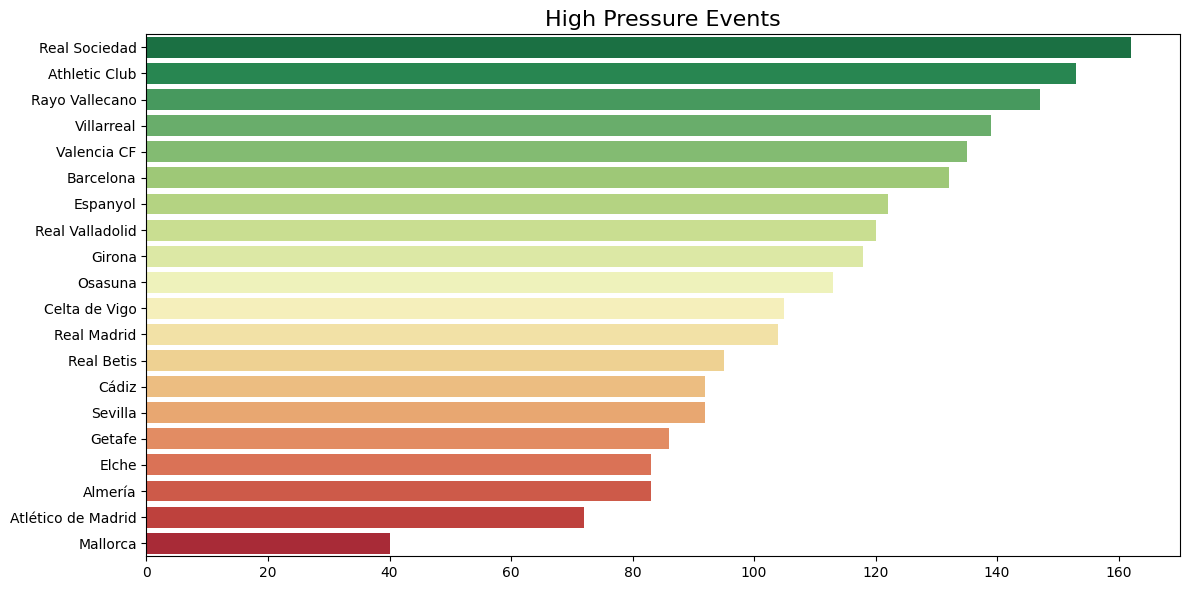

In [71]:
# Bar plot: Number of high pressure events by team
plt.figure(figsize=(12,6))
sns.barplot(
    data=results.sort_values(by='High Pressure Events', ascending=False).reset_index(drop=True),
    x="High Pressure Events",
    y="Team",
    hue="Team",
    palette="RdYlGn_r",
    legend=False
)
plt.title("High Pressure Events", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

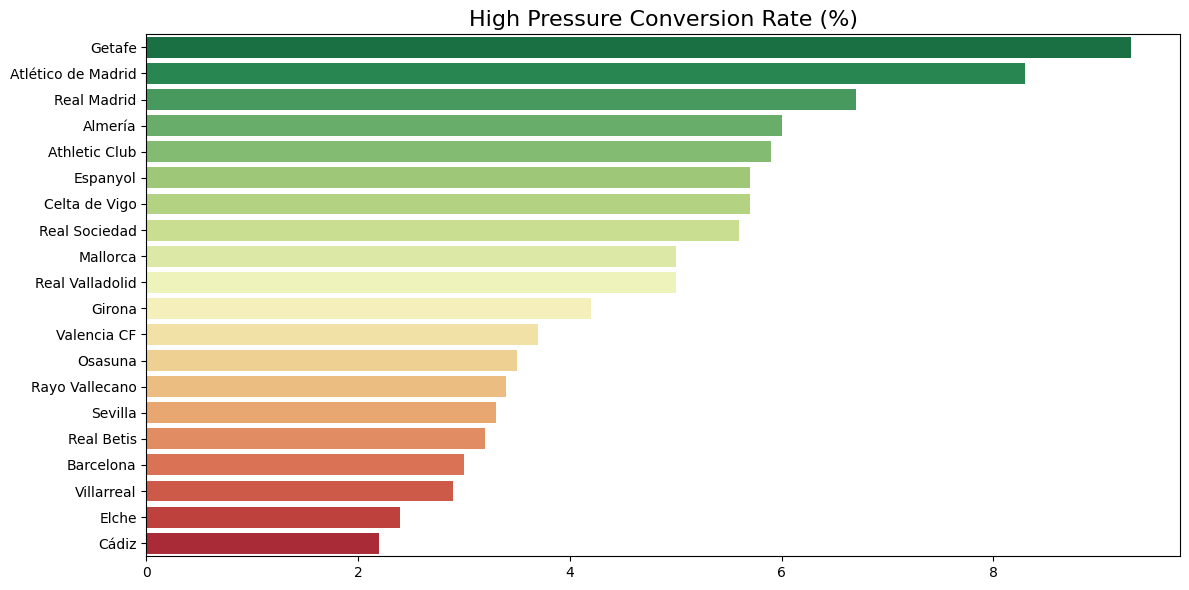

In [72]:
# Bar plot: High Pressure Conversion Rate (%) by team
plt.figure(figsize=(12,6))
sns.barplot(
    data=results,
    x="High Pressure Conversion Rate",
    y="Team",
    hue="Team",
    palette="RdYlGn_r",
    legend=False
)
plt.title("High Pressure Conversion Rate (%)", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

This analysis evaluates how effectively La Liga teams in the 2023 season were able to convert high-pressure recoveries in the final third into goals, highlighting the efficiency of high pressing tactics in converting defensive actions into offensive outcomes.

**Top Performers**

* Getafe leads the league with a 9.3% HPCR, which is an outstanding result, especially given their relatively low number of high-pressure events (86). This indicates that Getafe is highly efficient in converting pressing actions into goals, showing a sharp ability to punish opponents immediately after winning possession high up the pitch.

* Atlético de Madrid ranks second with an 8.3% conversion rate, showcasing their trademark pressing efficiency under Diego Simeone. Despite not being the most frequent pressers, their precision and transition execution remain elite.

* Real Madrid follows closely with a 6.7% HPCR, combining high pressing volume (104 events) with effective offensive follow-through. This reflects their ability to quickly turn defense into attack, especially through explosive midfield transitions.

* Almería (6.0%), Athletic Club (5.9%), and Espanyol (5.7%) also deliver notable conversion rates. Almería's numbers are especially interesting considering their lower-tier status overall — suggesting a strength in specific pressing scenarios.

* Celta de Vigo (5.7%) and Real Sociedad (5.6%) round out the upper group, indicating a consistent ability to generate and exploit high-pressure chances, even if not at the very top in terms of efficiency.

**Mid-tier Performers**

* Mallorca (5.0%), Real Valladolid (5.0%), and Girona (4.2%) fall into a middle bracket — decent but not exceptional. These teams demonstrate a balanced approach but may lack the final-product sharpness seen in top-tier pressers.

* Valencia CF (3.7%), Osasuna (3.5%), Rayo Vallecano (3.4%), and Sevilla (3.3%) operate in a lower-middle range. These figures suggest that while pressing is frequent, the attacking transition or finishing phase often breaks down.

* Real Betis (3.2%) and Barcelona (3.0%) fall into a surprising mid-to-low bracket. In Barcelona's case, despite a high pressing volume (132 events), the relatively poor conversion rate suggests issues with translating pressure into direct chances — possibly due to a slower, possession-focused buildup after recovery.

**Underperformers**

* Villarreal (2.9%), Elche (2.4%), and Cádiz (2.2%) sit at the bottom of the table. Villarreal's 139 pressure events coupled with only four goals highlight a concerning gap between opportunity creation and execution — a sign that while the press is effective in terms of volume, it lacks end product.

* Elche and Cádiz’s low HPCRs likely reflect broader struggles in squad quality, transitions, or attacking depth. These teams may need to revisit their post-recovery offensive setups or personnel.

**Conclusion**

The High Pressure Conversion Rate (HPCR) provides a clear picture of how well teams capitalize on winning the ball in dangerous areas. Getafe’s league-best 9.3% reflects a focused, efficient pressing style that extracts maximum value from fewer attempts. Atlético de Madrid and Real Madrid show that high-level execution can come from both moderate and high pressing volumes, provided transitions are sharp.

Teams in the middle, like Mallorca or Girona, show potential but may need more cohesion in final third actions after pressing. Meanwhile, clubs like Villarreal, Elche, and Cádiz expose a weakness in converting defensive aggression into goals — something that can be tactical, structural, or down to player quality.

Overall, this metric reinforces the idea that pressing alone isn’t enough — it's the efficiency of what happens after the press that defines true success.

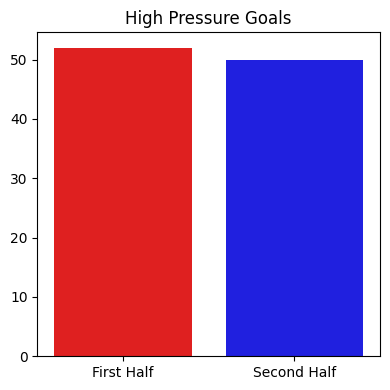

In [73]:
# Filter only high-pressure events that led to goals
hp_goals = all_events[all_events["Lead to Goal"] == 1]

# Count how many occurred in each half
hp_goals_by_period = hp_goals.groupby("period_id").size().reset_index(name="Total High Pressure Goals")

# Bar plot: Goals from High Pressure by Half
plt.figure(figsize=(4, 4))
sns.barplot(data=hp_goals_by_period, x="period_id", y="Total High Pressure Goals", hue="period_id", palette=["red", "blue"], legend=False)
plt.title("High Pressure Goals")
plt.xlabel("")
plt.ylabel("")
plt.xticks(ticks=[0, 1], labels=['First Half', 'Second Half'])  # Change x-axis labels
plt.tight_layout()
plt.show()

A nearly even split between 52 goals in the first half and 50 in the second half suggests that teams are not significantly more effective in converting high-pressure situations during one half over the other. This balance implies consistency in tactical execution and energy levels across both halves, rather than a reliance on late surges or early aggression. It also reflects how teams are able to maintain pressing intensity and capitalize on chances throughout the full 90 minutes.

# **Use Case and Application:**
Clubs and analysts can use this metric to:

* Evaluate tactical efficiency - not just pressing volume but output.

* Identify undervalued teams or players who contribute to pressing sequences leading to goals.

* Inform scouting, especially when looking for pressing forwards or midfielders who win possession high and create immediate danger.

# **Conclusion**

The High Pressure Conversion Rate (HPCR) is a valuable metric that bridges defensive aggression with offensive productivity. By measuring how often teams score within two minutes of recovering the ball in the final third, this metric captures the effectiveness of high pressing as a tactical weapon — not just its frequency.

Ultimately, HPCR provides deeper insight into which teams capitalize on chaos, turning defensive actions into attacking threats — a key hallmark of modern, high-intensity football.

This metric captures the real impact of pressing — not just effort but outcomes. It can inform tactical evaluations, team scouting, or even in-game strategic adjustments.